# Cluster Analysis
The historical stock price movement for 39 companies. This stock price movement is defined as the difference in dollar amount between the closing and opening prices for each trading day. The data was originally collected from Yahoo Finance for 2010 to 2015 duration. Each column represents a trading day and each row represents a company. Refer to the header and index for details about the trading day and companies.

Importing all the related packages related to data exploration ,manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

before importing the stocks data directly i did transpose of the data and save in final-stock-data and imported

In [2]:
data = pd.read_csv('final-stock-data.csv')
print('Shape of the Dataset-->',data.shape)

Shape of the Dataset--> (963, 40)


Printing the top 5 rows of the datafile

In [3]:
data.head()

,Month,AIG,American express,Boeing,Bank of America,Canon,Caterpillar,Colgate-Palmolive,Cisco,Dell,...,Toyota,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
0,04-01-2010,-0.640002,0.109997,0.459999,0.450000,0.730000,0.899997,0.360000,0.580000,-0.08,...,0.330002,-0.190001,0.060001,0.640002,0.290001,0.300000,0.489998,0.430001,0.09,0.159999
1,05-01-2010,-0.650000,0.000000,1.770000,0.460001,0.369999,0.700001,0.909996,-0.020000,0.10,...,0.599999,-0.090000,-0.039997,0.230002,-0.099998,0.800000,-0.400001,0.229996,0.01,0.010001
2,06-01-2010,-0.210001,0.260002,1.549999,0.180000,-0.099999,0.250000,-0.290001,-0.120001,-0.17,...,0.489998,-0.230000,0.140001,0.419999,0.560001,0.080000,0.070000,0.570000,-0.08,0.000000
3,07-01-2010,-0.420000,0.720002,2.690003,0.250000,-0.169999,0.369999,-0.059998,0.230002,0.15,...,0.680000,0.150000,-0.010000,0.170007,0.250000,1.009998,-0.120003,-0.099999,0.07,-0.109998
4,08-01-2010,0.710001,0.190003,0.059997,-0.199999,0.030003,1.090000,1.300003,0.280001,0.05,...,1.260002,0.740000,0.180000,-0.239991,0.070004,-0.039999,-0.099998,-0.170005,-0.01,0.020001


Describing the entire datas mean,std,min,max of all the features in that data

In [4]:
data.describe()

,AIG,American express,Boeing,Bank of America,Canon,Caterpillar,Colgate-Palmolive,Cisco,Dell,Ford,...,Toyota,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,...,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,-0.016272,0.044206,0.038733,-0.019418,0.012700,-0.025607,0.079273,-0.000447,0.008214,-0.010343,...,0.035036,0.035691,0.012565,0.003738,0.035462,0.011755,0.038733,0.043510,-0.001558,-0.000831
std,0.793653,0.678781,0.947419,0.223088,0.362598,1.236689,0.734869,0.244211,0.204687,0.219468,...,0.675504,0.398248,0.255976,0.551102,0.474825,0.442863,0.482442,0.698473,0.144362,0.287091
min,-4.810001,-2.809997,-4.989998,-1.199999,-2.299999,-4.849999,-3.900001,-1.120001,-0.880000,-1.520001,...,-2.709999,-1.349998,-1.170000,-2.789995,-1.890000,-1.770001,-1.880001,-2.930000,-0.860000,-1.529999
25%,-0.400000,-0.359998,-0.515000,-0.145000,-0.170000,-0.720001,-0.360001,-0.130001,-0.100000,-0.130000,...,-0.350002,-0.190002,-0.130001,-0.305001,-0.240001,-0.240002,-0.240004,-0.364998,-0.080000,-0.150000
50%,-0.029999,0.060001,0.050003,-0.020000,0.010003,0.009995,0.040001,0.000000,0.000000,-0.010000,...,0.049996,0.049999,0.020000,0.009999,0.029999,0.010002,0.030003,0.060005,0.000000,-0.010000
75%,0.330002,0.470001,0.555001,0.110000,0.200001,0.700001,0.505001,0.140002,0.102500,0.110000,...,0.390000,0.280001,0.170002,0.350000,0.300003,0.270001,0.324997,0.485000,0.080000,0.139999
max,5.340000,2.519996,3.090000,1.030000,3.169999,4.270004,3.220001,0.990000,1.400000,1.010000,...,4.509995,1.750002,1.150000,2.140000,2.250000,2.060002,2.029999,3.060006,0.440000,2.000000


Checking weather there are any null values in that columns and there count

In [5]:
data.isnull().sum()

Month                0
AIG                  0
American express     0
Boeing               0
Bank of America      0
Canon                0
Caterpillar          0
Colgate-Palmolive    0
Cisco                0
Dell                 0
Ford                 0
General Electrics    0
Home Depot           0
Honda                0
HP                   0
Intel                0
Johnson & Johnson    0
JPMorgan Chase       0
Coca Cola            0
Lookheed Martin      0
McDonalds            0
3M                   0
Microsoft            0
Mitsubishi           0
Navistar             0
Pepsi                0
Pfizer               0
Procter Gamble       0
Sony                 0
Symantec             0
Toyota               0
Texas instruments    0
Unilever             0
Valero Energy        0
Walgreen             0
Wells Fargo          0
Wal-Mart             0
Exxon                0
Xerox                0
Yahoo                0
dtype: int64

Using visualization check the null values in the dataset

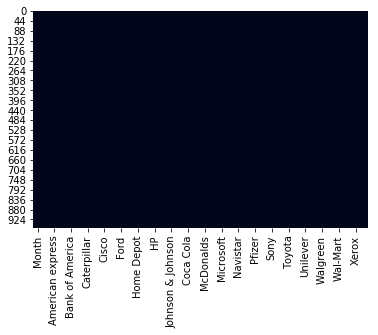

In [6]:
sns.heatmap(data.isnull(), cbar=False)

Entire information of the data columns,type,memory usage.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 40 columns):
Month                963 non-null object
AIG                  963 non-null float64
American express     963 non-null float64
Boeing               963 non-null float64
Bank of America      963 non-null float64
Canon                963 non-null float64
Caterpillar          963 non-null float64
Colgate-Palmolive    963 non-null float64
Cisco                963 non-null float64
Dell                 963 non-null float64
Ford                 963 non-null float64
General Electrics    963 non-null float64
Home Depot           963 non-null float64
Honda                963 non-null float64
HP                   963 non-null float64
Intel                963 non-null float64
Johnson & Johnson    963 non-null float64
JPMorgan Chase       963 non-null float64
Coca Cola            963 non-null float64
Lookheed Martin      963 non-null float64
McDonalds            963 non-null float64
3M            

Column names of the dataset

In [8]:
data.columns

Index(['Month', 'AIG', 'American express', 'Boeing', 'Bank of America',
       'Canon', 'Caterpillar', 'Colgate-Palmolive', 'Cisco', 'Dell', 'Ford',
       'General Electrics', 'Home Depot', 'Honda', 'HP', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Coca Cola', 'Lookheed Martin',
       'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Pepsi',
       'Pfizer', 'Procter Gamble', 'Sony', 'Symantec', 'Toyota',
       'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen',
       'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo'],
      dtype='object')

Finding the co relation between the all the features of the data set and visualizing using seaborn heatmap

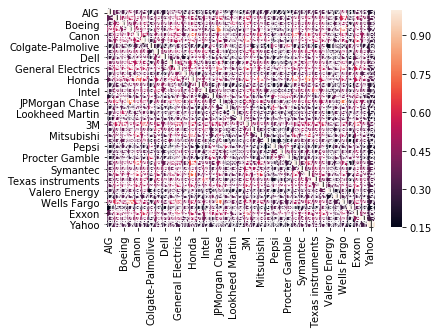

In [9]:
correlation_matrix = data.corr()
sns.heatmap(data=correlation_matrix, annot=True)

From the data column Month we are changing to date type and considering month from that date and setting index for month

In [10]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

Printing the top 5 rows of the data after changing the date type and setting index

In [11]:
data.head()

,AIG,American express,Boeing,Bank of America,Canon,Caterpillar,Colgate-Palmolive,Cisco,Dell,Ford,...,Toyota,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
Month,,,,,,,,,,,,,,,,,,,,,
2010-04-01,-0.640002,0.109997,0.459999,0.450000,0.730000,0.899997,0.360000,0.580000,-0.08,0.11,...,0.330002,-0.190001,0.060001,0.640002,0.290001,0.300000,0.489998,0.430001,0.09,0.159999
2010-05-01,-0.650000,0.000000,1.770000,0.460001,0.369999,0.700001,0.909996,-0.020000,0.10,0.51,...,0.599999,-0.090000,-0.039997,0.230002,-0.099998,0.800000,-0.400001,0.229996,0.01,0.010001
2010-06-01,-0.210001,0.260002,1.549999,0.180000,-0.099999,0.250000,-0.290001,-0.120001,-0.17,0.16,...,0.489998,-0.230000,0.140001,0.419999,0.560001,0.080000,0.070000,0.570000,-0.08,0.000000
2010-07-01,-0.420000,0.720002,2.690003,0.250000,-0.169999,0.369999,-0.059998,0.230002,0.15,0.20,...,0.680000,0.150000,-0.010000,0.170007,0.250000,1.009998,-0.120003,-0.099999,0.07,-0.109998
2010-08-01,0.710001,0.190003,0.059997,-0.199999,0.030003,1.090000,1.300003,0.280001,0.05,0.02,...,1.260002,0.740000,0.180000,-0.239991,0.070004,-0.039999,-0.099998,-0.170005,-0.01,0.020001


# Time series plots on the stocks data

Plotting all the 39 companies stock trend line month wise from 2010 to 2015

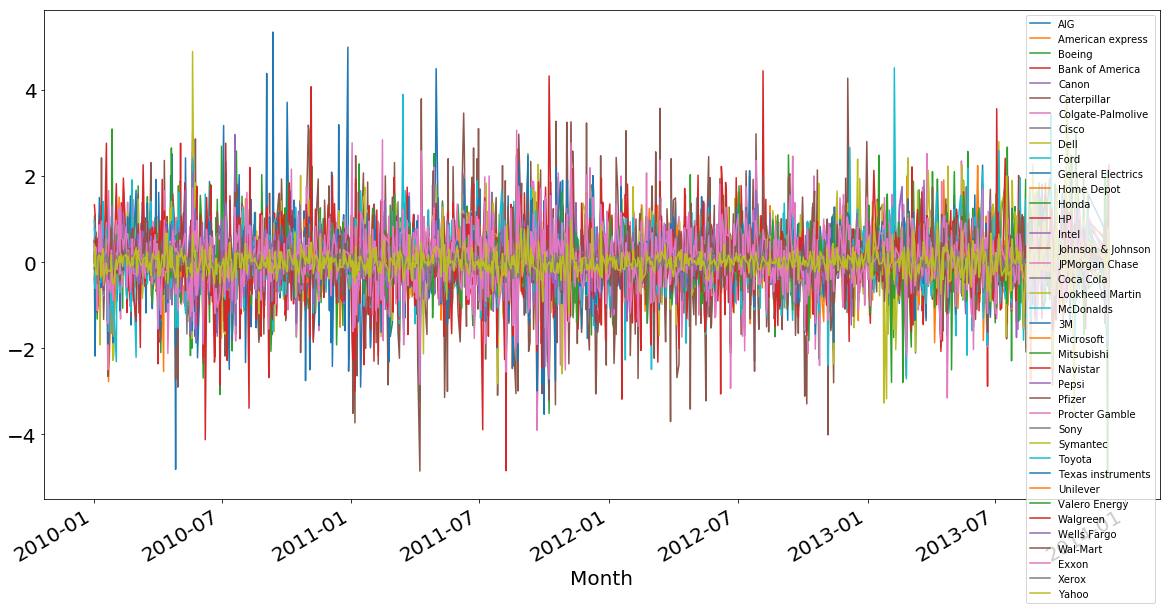

In [12]:
data.plot(figsize=(20,10), fontsize=20)
plt.xlabel('Month', fontsize=20);

plotting individual stocks trend line for company Dell.

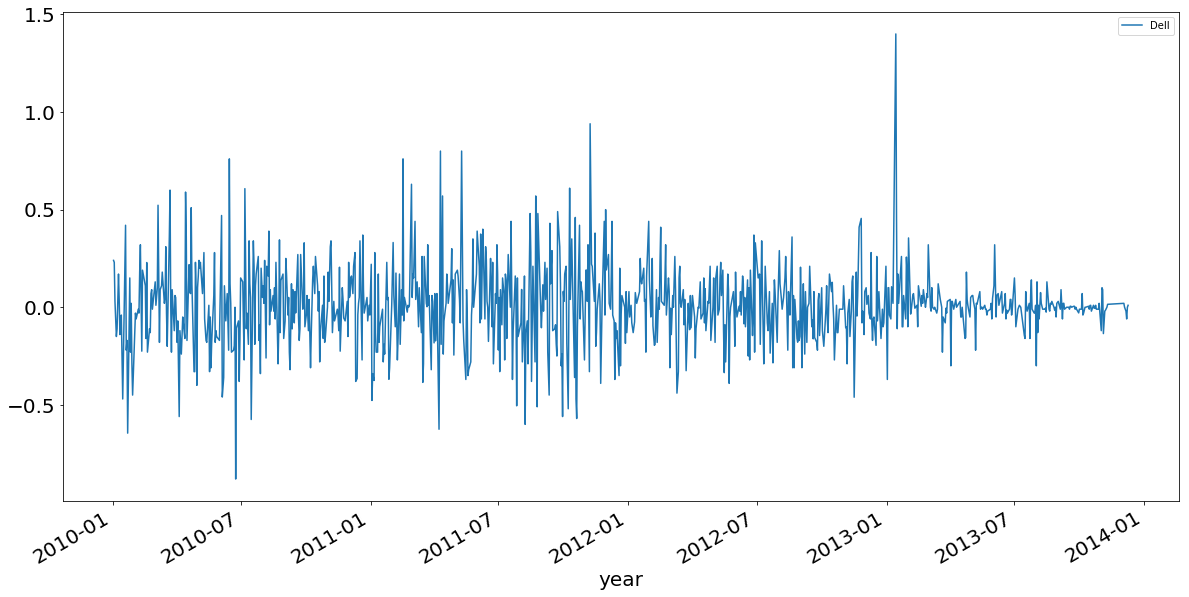

In [13]:
data[['Dell']].plot(figsize=(20,10), fontsize=20)
plt.xlabel('year', fontsize=20);

plotting individual stocks trend line for company HP.

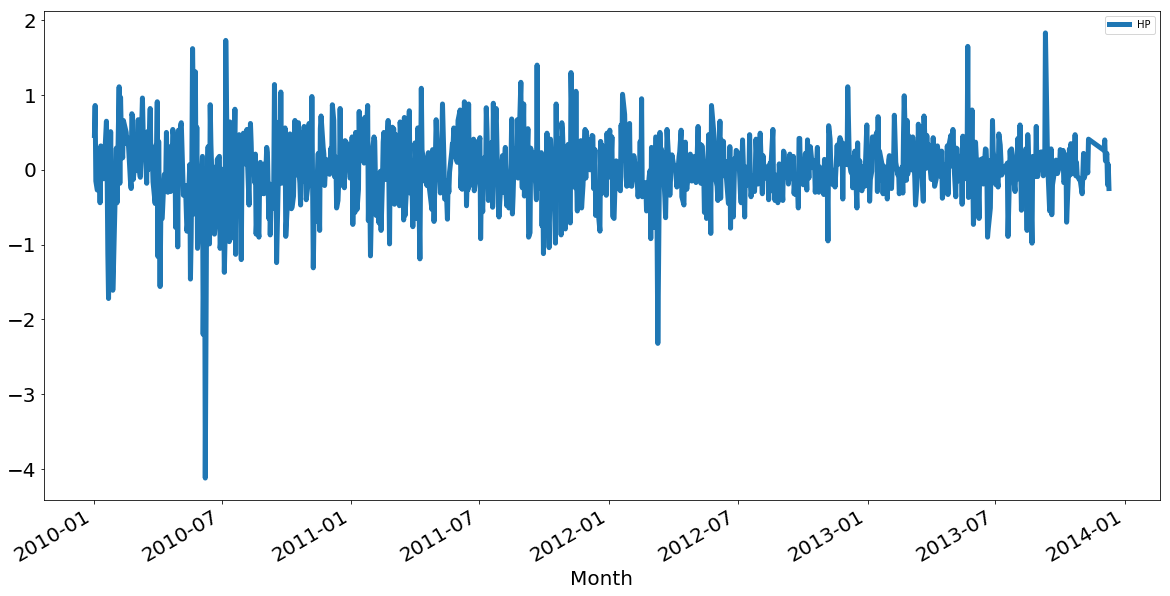

In [14]:
data[['HP']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

plotting individual stocks trend line by applying mean for company HP over a period of 2010 to 2015

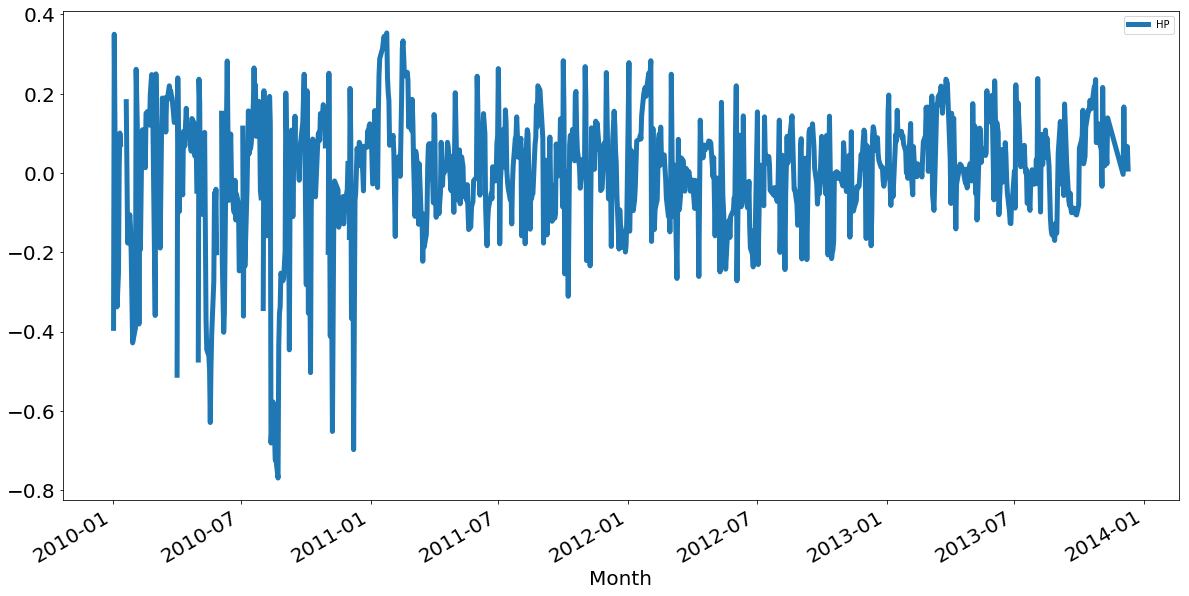

In [15]:
HP = data[['HP']]
HP.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

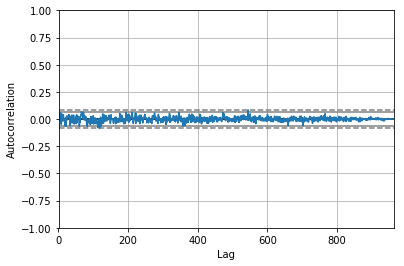

In [16]:
pd.plotting.autocorrelation_plot(data['HP'])

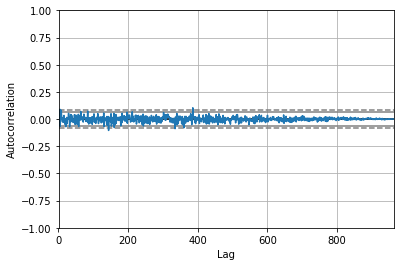

In [17]:
pd.plotting.autocorrelation_plot(data['Exxon'])

All of the Machine Learning algorithm that are based on some distance based metric, such 
as Euclidean distance, are adversely affected if the input values are not standardized to a 
range


To perform min-max normalization on a set of values in a column of data, you first determine the largest and smallest values in the column. Then each value v in the column is replaced by (v - min) / (max - min)

Import minmaxscaler and fit to the dataset (stock_data) and Transform the fit model.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [19]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

Using the help of elbow technique we can find the no of clusters suitable for our data features using SSQ(Sum of squared errors) 1 too 11 cluster points.

In [20]:
# from sklearn.cluster import KMeans
ssq = []
for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=999)
    kmeans_model.fit(data_scaled)
    ssq.append(kmeans_model.inertia_)

In [21]:
ssq

[450.1130237845473,
 342.41356053368037,
 302.8787286958087,
 286.96201442642996,
 277.6721979812798,
 271.15545764296184,
 266.2485107197825,
 262.7677675123193,
 259.3898397829633,
 256.8437886269224]

Plot the SSq values in a line graph pointing all the 10 cluster points 

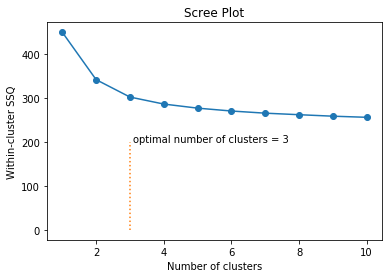

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([3]*200, range(1,201), ":")
plt.text(3.1, 201, "optimal number of clusters = 3")
plt.show()

Test how the results look for K=3. To do this, all you need to change is the target number of clusters in the KMeans() function.

At cluster 3 we can see a elbow edge point at 302.8 positon. 

Fit the number of cluster 3 with random state 999 using kmeans  with standardization

# Kmeans cluster :

We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the kMeans algorithm; an unsupervised learning algorithm.


By looking at the Scatter plot ploted looks like it fit for 3 cluster let we initially check with 2 clusters using kmeans with random state of 678 with MinMaxScaler

In [23]:
km = KMeans(n_clusters=3, random_state=678)

Fit the data to the model of kmeans

In [24]:
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=678, tol=0.0001, verbose=0)

Final Cluster centroids of the model after default n_init and max_iteration as 10 and 300 with 3 clusters

In [25]:
km.cluster_centers_

array([[0.46936043, 0.52444248, 0.61780994, 0.52478803, 0.41745737,
        0.51829854, 0.55096307, 0.52630163, 0.38784592, 0.59379525,
        0.51570364, 0.55348337, 0.36229362, 0.69275697, 0.44539986,
        0.39298746, 0.44594067, 0.47517104, 0.42634096, 0.47356712,
        0.5444853 , 0.59414914, 0.48668346, 0.51209073, 0.43694882,
        0.54517547, 0.53668792, 0.48576302, 0.42770063, 0.37304903,
        0.43147657, 0.49922175, 0.56677169, 0.4597759 , 0.45709507,
        0.48005243, 0.48925083, 0.65247253, 0.43133108],
       [0.51201776, 0.63511621, 0.70270027, 0.59836861, 0.47206848,
        0.63284807, 0.61824143, 0.6091958 , 0.43601569, 0.65160372,
        0.6403051 , 0.62724715, 0.43982953, 0.73606661, 0.57800726,
        0.44826618, 0.53402439, 0.54059323, 0.48455255, 0.56289193,
        0.6699864 , 0.6794835 , 0.55298141, 0.58312956, 0.49156567,
        0.63000701, 0.60744251, 0.54068058, 0.52796473, 0.45082197,
        0.54544208, 0.59213724, 0.62157411, 0.52632689, 0.5

Make predictions for the clusters of the given dataset.

In [26]:
predicted_cluster = km.predict(data_scaled)
predicted_cluster[:5]

array([1, 0, 0, 1, 1])

In [27]:
km.cluster_centers_

array([[0.46936043, 0.52444248, 0.61780994, 0.52478803, 0.41745737,
        0.51829854, 0.55096307, 0.52630163, 0.38784592, 0.59379525,
        0.51570364, 0.55348337, 0.36229362, 0.69275697, 0.44539986,
        0.39298746, 0.44594067, 0.47517104, 0.42634096, 0.47356712,
        0.5444853 , 0.59414914, 0.48668346, 0.51209073, 0.43694882,
        0.54517547, 0.53668792, 0.48576302, 0.42770063, 0.37304903,
        0.43147657, 0.49922175, 0.56677169, 0.4597759 , 0.45709507,
        0.48005243, 0.48925083, 0.65247253, 0.43133108],
       [0.51201776, 0.63511621, 0.70270027, 0.59836861, 0.47206848,
        0.63284807, 0.61824143, 0.6091958 , 0.43601569, 0.65160372,
        0.6403051 , 0.62724715, 0.43982953, 0.73606661, 0.57800726,
        0.44826618, 0.53402439, 0.54059323, 0.48455255, 0.56289193,
        0.6699864 , 0.6794835 , 0.55298141, 0.58312956, 0.49156567,
        0.63000701, 0.60744251, 0.54068058, 0.52796473, 0.45082197,
        0.54544208, 0.59213724, 0.62157411, 0.52632689, 0.5

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, km.labels_)

0.1401195814833517

Plot a visualization plot of data clustered into 3 clusters with their centroids and different colors for 3 clusters with legands .

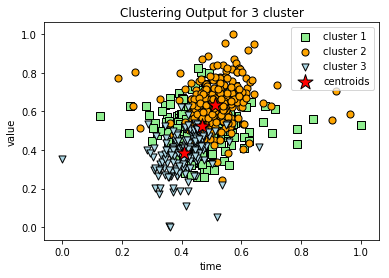

In [29]:
plt.scatter(data_scaled[predicted_cluster==0,0], data_scaled[predicted_cluster==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(data_scaled[predicted_cluster==1,0], data_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(data_scaled[predicted_cluster==2,0], data_scaled[predicted_cluster==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("time")
plt.ylabel("value")
plt.title("Clustering Output for 3 cluster")
#plt.ylim(0, 1.5)
#plt.xlim(0,1.5)
plt.show()

# Interpretation:
A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters

# Apply Hierarchical Clustering to partition the customer into distinct cluster
 This clustering method lends itself to an intuitive graphical display in the form of a tree-based 
representation of the observations, called a dendrogram, leading to easier interpretation of the 
clusters

Using Scipy we will first create dendrogram for this dataset.

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

Make dendogram black.

In [31]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

**Euclidean distance: The Euclidean distance between two points is the length of the shortest path connecting them.

**Ward Linkage: In Ward’s linkage clusters that lead to minimum increase in total within cluster sum of squares are merged.

In [32]:
link = linkage(data_scaled, method='ward', metric='euclidean')

Plot a dendrogram using matplotlib with Euclidean distance

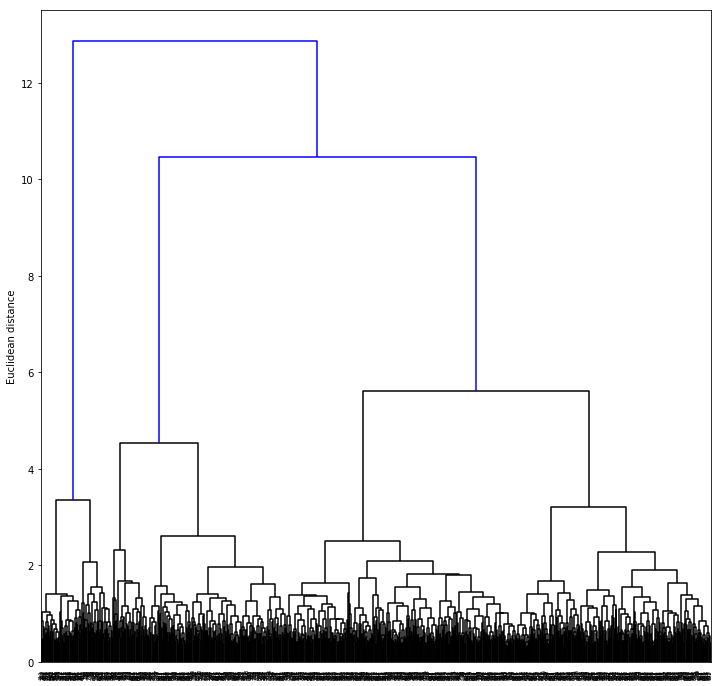

In [33]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

As a rule of thumb, we can cut the dendrogram where the gap between two successive combination similarities is largest. In the above dendogram, we can make this cut for 3 clusters.

One rule of thumb is to cut the dendrogram where the gap between two successive combination similarities is largest. 
Such large gaps arguably indicate "natural" clusterings.

Cutting at euclidean distance at 8 we will get 3 clusters formed.

Read more about how to find an optimal cut: https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-agglomerative-clustering-1.html

We can also verify if this number of cuts are numerically a good choice by calculating and compraing Silhouette score for different cluster values.

Agglomerative: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
model = AgglomerativeClustering(n_clusters=3)

In [36]:
model.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

Check out the cluster predictions made by the model for our dataset.

In [37]:
model.labels_

array([2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2,

Next, we calculate the Silhouette score using Scikit-Learn's metrics class.

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance


In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, model.labels_)

0.14640286557426796

**Note A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters

**Silhouette_score with features with the model,labels gives 0.14 .from this we can conform that those  cluster are far away from each other.

Kmeans clustering : We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the kMeans algorithm; an unsupervised learning algorithm.

Hierarchical cluster analysis : It is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

**Kmeans silhouette_score = 0.1401195814833517

**Hierarchical silhouette_score = 0.14640286557426796

**From the above features methods with the totally segregated and clustered into 3 cluster in each method we observe that inter and intra clusters of kmeans cluster are good for cluster analysis.

**Note:How to validate as best cluster is by checking intra and inter cluster distances between points using centroid as random points and mean and replace the centroid to the center.

**How close are the point to the centroid cluster is individual cluster is good and how far is the distance to cluster centroids is good model.

**Note A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters

**This 2 methods of clustering are bad pick for the given data due to the presence of clusters with below average silhouette scores 0f less than 0.5

**By seeing silhouette_score Hierarchical score is 0.6% more then KMeans cluster analsyis that means the distance between the 3 cluster is more and properly clustered with Hierarchical cluster analysis  
